<a href="https://colab.research.google.com/github/urbanwaves10/Data-Bootcamp-Final-Project/blob/main/Saaesha_Bhimjiani_Final_Data_Bootcamp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saaesha Bhimjiani

Professor Koehler

Data Bootcamp

18 December, 2025

In [1]:
# Import required libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preparation

The purpose of this project is to predict whether a Citi Bike user on a given day will choose to ride an e-bike or a classic bike. Below, I have cleaned the data from Citi Bike to only preserve the data points from the start of rides, as we would like to predict behavior. I have used data from December 2024 to November 2025 in Jersey City, as that is the most recent year of data available.

In [2]:
#Uploaded CSV file to Github to access here

raw_urls = ['https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202412-citibike-tripdata%5B2%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202501-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202502-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202503-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202504-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202505-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202506-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202507-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202508-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202509-citibike-tripdata%5B2%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202510-citibike-tripdata%5B1%5D.csv',
            'https://raw.githubusercontent.com/urbanwaves10/Data-Bootcamp-Final-Project/refs/heads/main/JC-202511-citibike-tripdata%5B1%5D.csv']

dfs = []

for url in raw_urls:
    df = pd.read_csv(url)
    dfs.append(df)

citibike_df = pd.concat(dfs, ignore_index=True)

print(citibike_df.shape)
citibike_df.head()

(1009063, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,28A17ACD224CD80B,electric_bike,2024-12-06 17:50:49.428,2024-12-06 17:54:20.070,Oakland Ave,JC022,Hilltop,JC019,40.737604,-74.052478,40.731169,-74.057574,member
1,3508393A86FBD357,classic_bike,2024-12-14 11:01:00.309,2024-12-14 11:12:01.382,Oakland Ave,JC022,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.737604,-74.052478,40.735938,-74.030305,member
2,75FA4C03A1447401,electric_bike,2024-12-24 08:07:17.475,2024-12-24 08:14:14.612,Oakland Ave,JC022,Leonard Gordon Park,JC080,40.737604,-74.052478,40.745910,-74.057271,member
3,C7741EF495C597DD,classic_bike,2024-12-19 12:48:05.452,2024-12-19 12:54:15.253,Oakland Ave,JC022,Leonard Gordon Park,JC080,40.737604,-74.052478,40.745910,-74.057271,member
4,07952BB20B46C5B1,electric_bike,2024-12-17 11:19:37.631,2024-12-17 11:28:25.150,Oakland Ave,JC022,Grove St PATH,JC115,40.737604,-74.052478,40.719410,-74.043090,casual


In [3]:
# Identify end-of-trip columns
end_cols = [col for col in citibike_df.columns if col.lower().startswith("end")]

# Drop them
citibike_df = citibike_df.drop(columns=end_cols)

print("Dropped columns:", end_cols)
citibike_df.head()

Dropped columns: ['ended_at', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng']


,ride_id,rideable_type,started_at,start_station_name,start_station_id,start_lat,start_lng,member_casual
0,28A17ACD224CD80B,electric_bike,2024-12-06 17:50:49.428,Oakland Ave,JC022,40.737604,-74.052478,member
1,3508393A86FBD357,classic_bike,2024-12-14 11:01:00.309,Oakland Ave,JC022,40.737604,-74.052478,member
2,75FA4C03A1447401,electric_bike,2024-12-24 08:07:17.475,Oakland Ave,JC022,40.737604,-74.052478,member
3,C7741EF495C597DD,classic_bike,2024-12-19 12:48:05.452,Oakland Ave,JC022,40.737604,-74.052478,member
4,07952BB20B46C5B1,electric_bike,2024-12-17 11:19:37.631,Oakland Ave,JC022,40.737604,-74.052478,casual


In [4]:
#Convert to datetime for easier analysis/grouping later on
citibike_df['started_at'] = pd.to_datetime(citibike_df['started_at'])

#Create columns with month name, weekend True/False, date, hour, and day of week based on starting datetime for easier navigation
citibike_df['date'] = citibike_df['started_at'].dt.date
citibike_df['hour_of_day'] = citibike_df['started_at'].dt.hour
citibike_df['day_of_week'] = citibike_df['started_at'].dt.day_name()
citibike_df['month_name'] = citibike_df['started_at'].dt.month_name()

citibike_df.head()

,ride_id,rideable_type,started_at,start_station_name,start_station_id,start_lat,start_lng,member_casual,date,hour_of_day,day_of_week,month_name
0,28A17ACD224CD80B,electric_bike,2024-12-06 17:50:49.428,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-06,17,Friday,December
1,3508393A86FBD357,classic_bike,2024-12-14 11:01:00.309,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-14,11,Saturday,December
2,75FA4C03A1447401,electric_bike,2024-12-24 08:07:17.475,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-24,8,Tuesday,December
3,C7741EF495C597DD,classic_bike,2024-12-19 12:48:05.452,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-19,12,Thursday,December
4,07952BB20B46C5B1,electric_bike,2024-12-17 11:19:37.631,Oakland Ave,JC022,40.737604,-74.052478,casual,2024-12-17,11,Tuesday,December


In [5]:
weather_url = 'https://archive-api.open-meteo.com/v1/archive?latitude=40.7282&longitude=-74.0776&start_date=2024-12-01&end_date=2025-11-30&hourly=temperature_2m,precipitation&timezone=America%2FNew_York&temperature_unit=fahrenheit'

weather_response = requests.get(weather_url)

# Convert API response to JSON format
weather_data = weather_response.json()

# Extract the list of weather variables from the JSON structure
weather = weather_data['hourly']

# Convert the list of weather dictionaries into a pandas DataFrame
weather_df = pd.DataFrame(weather)

# Preview the first few rows to confirm data structure
weather_df.head()

,time,temperature_2m,precipitation
0,2024-12-01T00:00,28.0,0.0
1,2024-12-01T01:00,27.4,0.0
2,2024-12-01T02:00,26.7,0.0
3,2024-12-01T03:00,26.0,0.0
4,2024-12-01T04:00,25.5,0.0


In [6]:
#parse weather time to datetime
weather_df["time"] = pd.to_datetime(weather_df["time"])

# create merge keys that match citibike dataframe
weather_df["date"] = weather_df["time"].dt.date
weather_df["hour_of_day"] = weather_df["time"].dt.hour

print(weather_df.shape)
weather_df.head()

(8760, 5)


,time,temperature_2m,precipitation,date,hour_of_day
0,2024-12-01 00:00:00,28.0,0.0,2024-12-01,0
1,2024-12-01 01:00:00,27.4,0.0,2024-12-01,1
2,2024-12-01 02:00:00,26.7,0.0,2024-12-01,2
3,2024-12-01 03:00:00,26.0,0.0,2024-12-01,3
4,2024-12-01 04:00:00,25.5,0.0,2024-12-01,4


In [7]:
#merge on date, hour_of_day
master_df = citibike_df.merge(
    weather_df,
    on=["date", "hour_of_day"],
    how="left",
    validate="m:1"   # many rides per hour, one weather row per hour
)

print(master_df.shape)
master_df.head()

(1009063, 15)


,ride_id,rideable_type,started_at,start_station_name,start_station_id,start_lat,start_lng,member_casual,date,hour_of_day,day_of_week,month_name,time,temperature_2m,precipitation
0,28A17ACD224CD80B,electric_bike,2024-12-06 17:50:49.428,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-06,17,Friday,December,2024-12-06 17:00:00,29.1,0.0
1,3508393A86FBD357,classic_bike,2024-12-14 11:01:00.309,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-14,11,Saturday,December,2024-12-14 11:00:00,30.4,0.0
2,75FA4C03A1447401,electric_bike,2024-12-24 08:07:17.475,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-24,8,Tuesday,December,2024-12-24 08:00:00,26.2,0.9
3,C7741EF495C597DD,classic_bike,2024-12-19 12:48:05.452,Oakland Ave,JC022,40.737604,-74.052478,member,2024-12-19,12,Thursday,December,2024-12-19 12:00:00,43.0,0.0
4,07952BB20B46C5B1,electric_bike,2024-12-17 11:19:37.631,Oakland Ave,JC022,40.737604,-74.052478,casual,2024-12-17,11,Tuesday,December,2024-12-17 11:00:00,53.5,0.0


# Exploratory Data Analysis

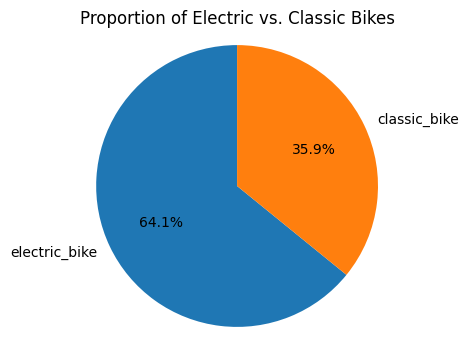

In [8]:
bike_type_counts = master_df['rideable_type'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(bike_type_counts, labels=bike_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Electric vs. Classic Bikes')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<Figure size 1000x500 with 0 Axes>

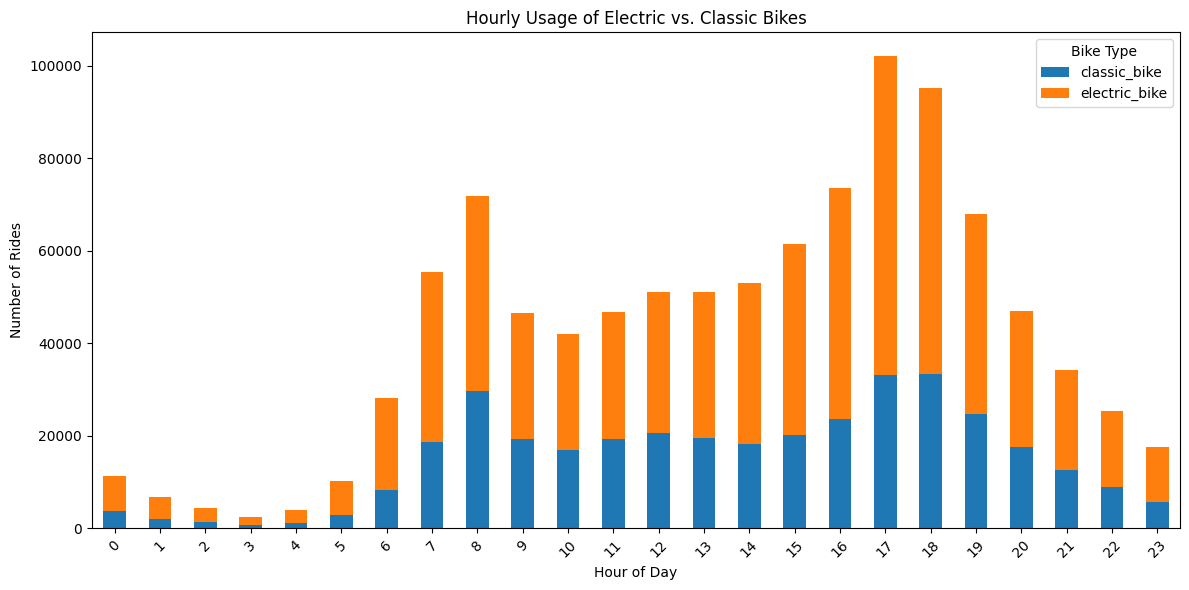

In [9]:
hourly_bike_usage = master_df.groupby(['hour_of_day', 'rideable_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
hourly_bike_usage.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Hourly Usage of Electric vs. Classic Bikes')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Bike Type')
plt.tight_layout()
plt.show()

/tmp/ipython-input-439021804.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_eda = master_df.groupby("temp_bin")["y"].mean()


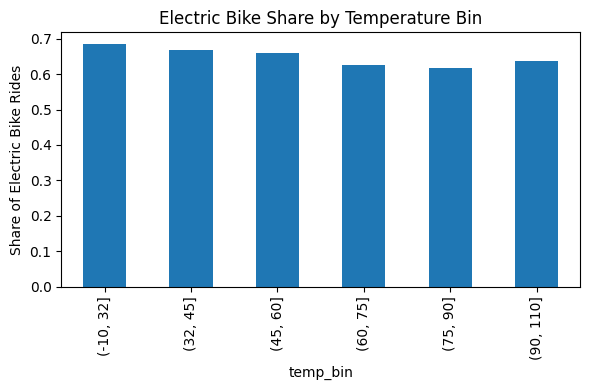

In [12]:
master_df["temp_bin"] = pd.cut(
    master_df["temperature_2m"],
    bins=[-10, 32, 45, 60, 75, 90, 110])

# Binary target: electric = 1, classic = 0
master_df["y"] = (master_df["rideable_type"] == "electric_bike").astype(int)

temp_eda = master_df.groupby("temp_bin")["y"].mean()

temp_eda.plot(kind="bar", figsize=(6,4))
plt.ylabel("Share of Electric Bike Rides")
plt.title("Electric Bike Share by Temperature Bin")
plt.tight_layout()
plt.show()

In [31]:
# percentage of e-bike rides per station
station_eda = (
    master_df.groupby("start_station_id")["y"]
    .mean()
    .sort_values(ascending=False))
station_eda

,y
start_station_id,
JC020,0.864620
JC057,0.860695
JC122,0.836923
JC034,0.827892
JC123,0.823276
...,...
JC027,0.485997
JC097,0.484171
JC110,0.475459


# Train/Test Split

In [14]:
# Binary target: electric = 1, classic = 0
master_df["y"] = (master_df["rideable_type"] == "electric_bike").astype(int)

# ensure true time-based split after concatenation
master_df = master_df.sort_values("started_at").reset_index(drop=True)

# Train = first 80% of time, Test = last 20%
split_idx = int(len(master_df) * 0.8)

train_df = master_df.iloc[:split_idx]
test_df  = master_df.iloc[split_idx:]

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)
print("Train electric share:", train_df["y"].mean())
print("Test electric share:", test_df["y"].mean())

Train size: (807250, 17)
Test size: (201813, 17)
Train electric share: 0.6347760916692474
Test electric share: 0.6679302126225763


# Preparing Data for Predictive Modeling

In [15]:
# Numeric features
num_features = [
    "start_lat",
    "start_lng",
    "temperature_2m",
    "precipitation",
    "hour_of_day"]

# Categorical features
cat_features = [
    "member_casual",
    "start_station_id"]

X_train = train_df[num_features + cat_features]
y_train = train_df["y"]

X_test  = test_df[num_features + cat_features]
y_test  = test_df["y"]

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))]) #sparse output made false because Boosted Ensemble later needs dense output

preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)])

# Predictive Modeling

## Dummy Baseline

Dummy AUC: 0.5
Dummy F1: 0.8009090639018449


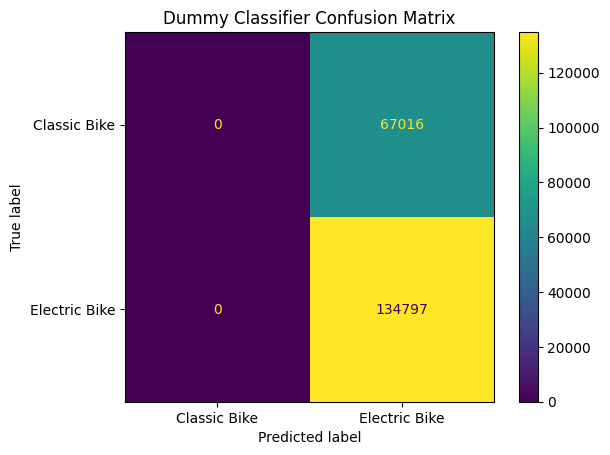

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dummy = Pipeline([
    ("preprocess", preprocessor),
    ("model", DummyClassifier(strategy="most_frequent"))])

dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_prob_dummy = dummy.predict_proba(X_test)[:, 1]

print("Dummy AUC:", roc_auc_score(y_test, y_prob_dummy))
print("Dummy F1:", f1_score(y_test, y_pred_dummy))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_dummy,
    display_labels=["Classic Bike", "Electric Bike"])

plt.title("Dummy Classifier Confusion Matrix")
plt.show()

## Logistic Regression Model

Logistic AUC: 0.6485166654562315
Logistic F1: 0.7920621874784333


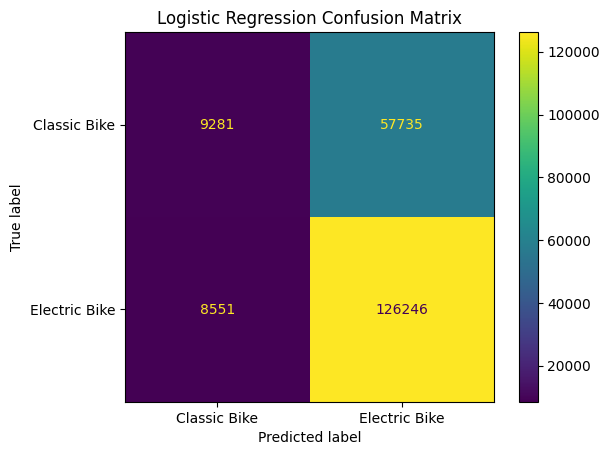

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))])

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic AUC:", roc_auc_score(y_test, y_prob_lr))
print("Logistic F1:", f1_score(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lr,
    display_labels=["Classic Bike", "Electric Bike"])

plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Decision Tree

Decision Tree AUC: 0.6500856139842641
Decision Tree F1: 0.7819996199686802


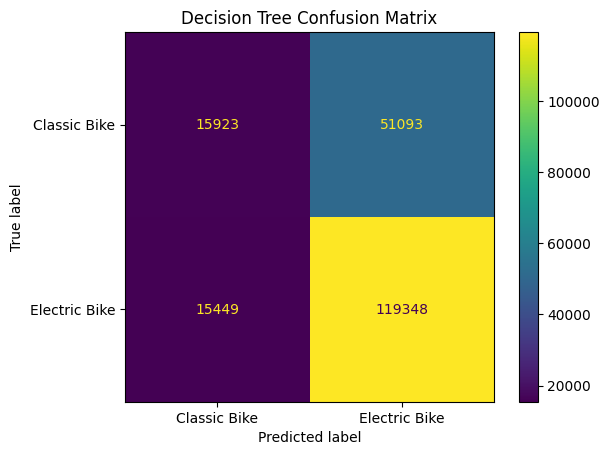

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

tree = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=12,                   #limit depth to reduce overfitting
        min_samples_leaf=50,            #
        random_state=42))])

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

print("Decision Tree AUC:", roc_auc_score(y_test, y_prob_tree))
print("Decision Tree F1:", f1_score(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_tree,
    display_labels=["Classic Bike", "Electric Bike"])

plt.title("Decision Tree Confusion Matrix")
plt.show()

## Random Forest

Random Forest AUC: 0.6640119103899897
Random Forest F1: 0.7949832954949791


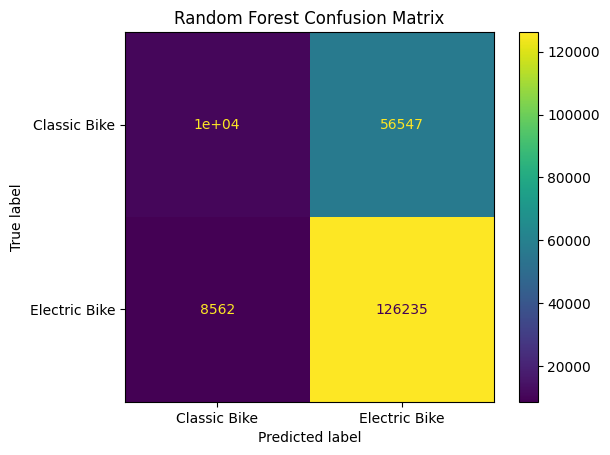

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=100,             #default estimator, especially for large datasets, to preserve stability without a very long runtime
        max_depth=20,                 #manage overfitting
        min_samples_leaf=25,
        n_jobs=-1,
        random_state=42))])

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest AUC:", roc_auc_score(y_test, y_prob_rf))
print("Random Forest F1:", f1_score(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=["Classic Bike", "Electric Bike"])

plt.title("Random Forest Confusion Matrix")
plt.show()

## Boosted Ensemble

Boosted (HGB) AUC: 0.6667031005666394
Boosted (HGB) F1: 0.7875649352760278


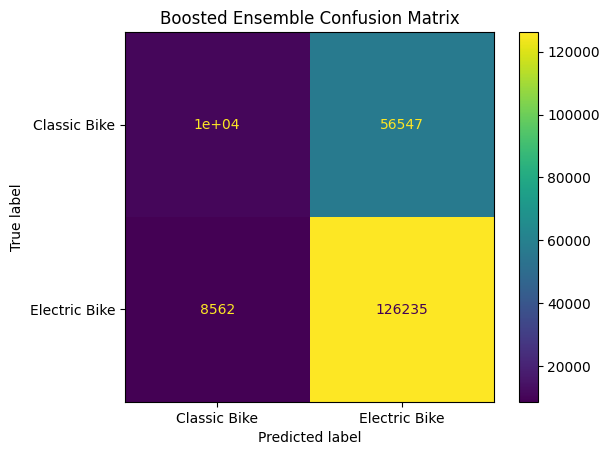

In [32]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = Pipeline([
    ("preprocess", preprocessor),
    ("model", HistGradientBoostingClassifier(
        max_depth=6,
        learning_rate=0.08,
        max_iter=300,
        random_state=42))])

hgb.fit(X_train, y_train)

# HistGradientBoostingClassifier uses decision_function; use predict_proba if available
if hasattr(hgb.named_steps["model"], "predict_proba"):
    y_prob_hgb = hgb.predict_proba(X_test)[:, 1]
else:
    scores = hgb.decision_function(X_test)
    y_prob_hgb = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)

y_pred_hgb = hgb.predict(X_test)

print("Boosted (HGB) AUC:", roc_auc_score(y_test, y_prob_hgb))
print("Boosted (HGB) F1:", f1_score(y_test, y_pred_hgb))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=["Classic Bike", "Electric Bike"])

plt.title("Boosted Ensemble Confusion Matrix")
plt.show()

## Artificial Neural Network

In [27]:
# ANN feature set (drop start_station_id to keep the network small + fast)
ann_num_features = ["start_lat", "start_lng", "temperature_2m", "precipitation", "hour_of_day"]
ann_cat_features = ["member_casual"]

X_train_ann = train_df[ann_num_features + ann_cat_features]
y_train_ann = train_df["y"].astype(int).values

X_test_ann  = test_df[ann_num_features + ann_cat_features]
y_test_ann  = test_df["y"].astype(int).values

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

ann_numeric = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

ann_cat = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

ann_preprocessor = ColumnTransformer([
    ("num", ann_numeric, ann_num_features),
    ("cat", ann_cat, ann_cat_features),])

Xtr = ann_preprocessor.fit_transform(X_train_ann)
Xte = ann_preprocessor.transform(X_test_ann)

# one-hot output may be sparse -> convert to dense for PyTorch
Xtr = Xtr.toarray() if hasattr(Xtr, "toarray") else Xtr
Xte = Xte.toarray() if hasattr(Xte, "toarray") else Xte

print("ANN input dimension:", Xtr.shape[1])

ANN input dimension: 7


In [29]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Tensors
Xtr_t = torch.tensor(Xtr, dtype=torch.float32)
ytr_t = torch.tensor(y_train_ann, dtype=torch.float32).view(-1, 1)

Xte_t = torch.tensor(Xte, dtype=torch.float32)
yte_t = torch.tensor(y_test_ann, dtype=torch.float32).view(-1, 1)

train_ds = TensorDataset(Xtr_t, ytr_t)
train_loader = DataLoader(train_ds, batch_size=4096, shuffle=True)

# Simple MLP
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)  # logits
        )
    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(Xtr.shape[1]).to(device)

loss_fn = nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

# Early stopping setup
best_loss = float("inf")
patience = 3
patience_left = patience

for epoch in range(1, 21):
    model.train()
    total_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        opt.step()
        total_loss += loss.item() * xb.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch:02d} | train loss: {avg_loss:.4f}")

    # early stopping on training loss
    if avg_loss < best_loss - 1e-4:
        best_loss = avg_loss
        patience_left = patience
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    else:
        patience_left -= 1
        if patience_left == 0:
            print("Early stopping.")
            break

# restore best weights
model.load_state_dict(best_state)
model.to(device)

Epoch 01 | train loss: 0.6451
Epoch 02 | train loss: 0.6380
Epoch 03 | train loss: 0.6363
Epoch 04 | train loss: 0.6351
Epoch 05 | train loss: 0.6341
Epoch 06 | train loss: 0.6333
Epoch 07 | train loss: 0.6327
Epoch 08 | train loss: 0.6321
Epoch 09 | train loss: 0.6317
Epoch 10 | train loss: 0.6312
Epoch 11 | train loss: 0.6311
Epoch 12 | train loss: 0.6307
Epoch 13 | train loss: 0.6306
Epoch 14 | train loss: 0.6303
Epoch 15 | train loss: 0.6301
Epoch 16 | train loss: 0.6299
Epoch 17 | train loss: 0.6299
Epoch 18 | train loss: 0.6297
Epoch 19 | train loss: 0.6295
Epoch 20 | train loss: 0.6292


MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

ANN AUC: 0.6572769081195349
ANN F1: 0.791611684403391


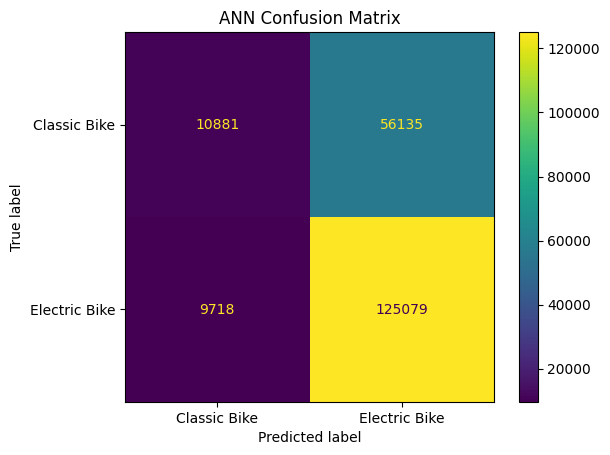

In [30]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
import numpy as np

model.eval()
with torch.no_grad():
    logits = model(Xte_t.to(device)).cpu().numpy().ravel()
    probs = 1 / (1 + np.exp(-logits))  # sigmoid
    preds = (probs >= 0.5).astype(int)

print("ANN AUC:", roc_auc_score(y_test_ann, probs))
print("ANN F1:", f1_score(y_test_ann, preds))

ConfusionMatrixDisplay.from_predictions(
    y_test_ann,
    preds,
    display_labels=["Classic Bike", "Electric Bike"])

plt.title("ANN Confusion Matrix")
plt.show()

# Feature Importance for Random Forest Model

In [24]:
# Get fitted Random Forest pipeline (rf from earlier)
rf_pipeline = rf  # assuming you named it `rf`

# Access the fitted preprocessor
pre = rf_pipeline.named_steps["preprocess"]

# Numeric feature names (unchanged)
num_feature_names = num_features

# Categorical feature names after one-hot encoding
ohe = pre.named_transformers_["cat"].named_steps["onehot"]
cat_feature_names = ohe.get_feature_names_out(cat_features)

# Combine all feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names)

In [25]:
importances = rf_pipeline.named_steps["model"].feature_importances_

feature_importance_df = (
    pd.DataFrame({
        "feature": all_feature_names,
        "importance": importances})
    .sort_values("importance", ascending=False))

feature_importance_df.head(15)

,feature,importance
2,temperature_2m,0.180382
4,hour_of_day,0.166429
0,start_lat,0.155838
1,start_lng,0.153977
6,member_casual_member,0.060922
5,member_casual_casual,0.053218
3,precipitation,0.019334
89,start_station_id_JC109,0.013561
49,start_station_id_JC020,0.013468
81,start_station_id_JC098,0.010855


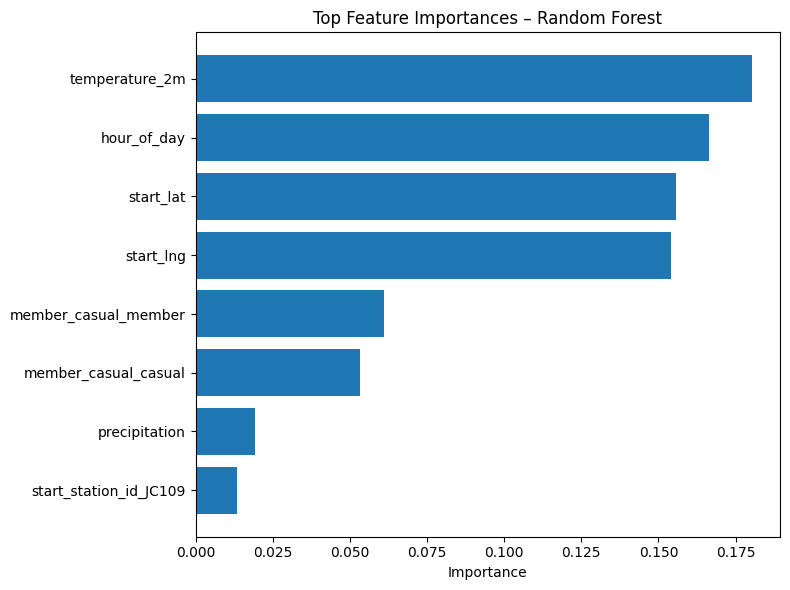

In [34]:
top_n = 8

plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance_df["feature"].head(top_n)[::-1],
    feature_importance_df["importance"].head(top_n)[::-1])

plt.title("Top Feature Importances – Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()